Importação de bilbiotecas. Por se tratar de um dataset simples apenas o pandas e matplotlib conseguem tratar os dados.

In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

Importação do CSV diretamente do Github

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/adrielvasques/desafioBemol/main/desafio_first_sheet.csv" ,sep=',')

Extraindo nome dos vendedores. Converter o sistema de data e hora. Converter os valores de dinheiro de string para valores a serem somados.

In [156]:
#Extração dos vendedores
vendedores = df['nome'].unique()
#Conversão do sistema data hora
df['data_compra'] = pd.to_datetime(df.data_compra, format="%Y-%m-%d %H:%M:%S")
#Conferindo o tipo da coluna valor_compra
type(df.valor_compra[0])
#convertendo de valores de string para float
df['valor_compra'] = df['valor_compra'].apply(lambda x: str(x).replace("R$", ""))
df['valor_compra'] = df['valor_compra'].apply(lambda x: str(x).replace(",", ""))
df['Imposto'] = df['Imposto'].apply(lambda x: str(x).replace("R$", ""))
df['Imposto'] = df['Imposto'].apply(lambda x: str(x).replace(",", ""))
df['Imposto'] = df['Imposto'].apply(lambda x: float(x))
df['valor_compra'] = df['valor_compra'].apply(lambda x: float(x))

Verificando a quantidade de lojas e período das vendas

In [157]:
inicio_periodo_de_venda = df['data_compra'].min()
fim_periodo_de_venda = df['data_compra'].max()
periodo_de_venda = fim_periodo_de_venda - inicio_periodo_de_venda 
lojas_list = df['Filial'].unique()

Obtenção de dados da venda por loja

In [182]:
vendas_por_loja = []
valor_venda = 0

for loja in lojas_list:
  for index in range(0, len(df)):
    if(df['Filial'][index]== loja):
      valor_venda = valor_venda + df['valor_compra'][index]
  vendas_por_loja.append([loja, round(valor_venda,2)])
  valor_venda = 0

Plotagem dos Dados em histograma do total vendido por loja

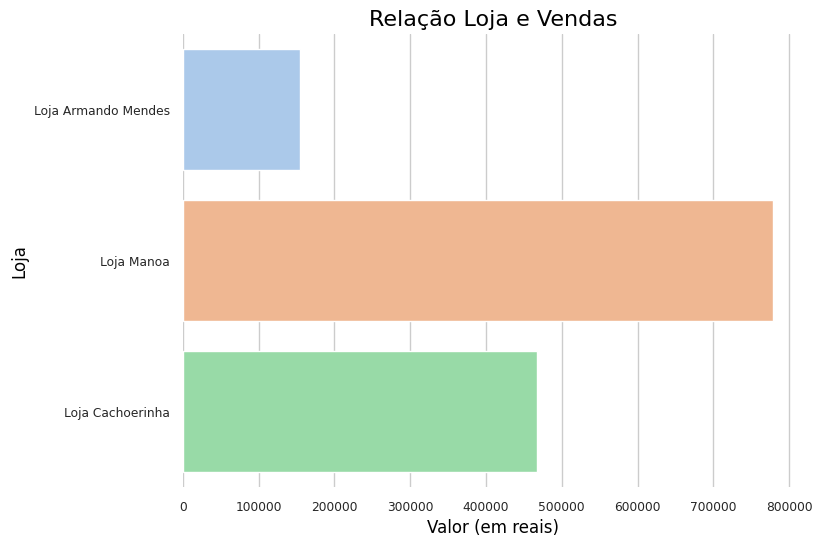

In [341]:
venda_loja_df = pd.DataFrame(vendas_por_loja, columns =['loja', 'valor_total_venda'])


plt.figure(figsize=(8, 6), dpi=100)
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1})
lojas = venda_loja_df['loja'].tolist()
valor_vendas = venda_loja_df['valor_total_venda'].tolist()

g = sns.barplot(x="valor_total_venda", y="loja", data=venda_loja_df, color="blue", orient="h", palette="pastel")
g.axes.set_title('Relação Loja e Vendas' , fontsize=16,color="black",alpha=2)

g.set_xlabel("Valor (em reais)", size = 12,color="black")
g.set_ylabel("Loja", size = 12,color="black")
sns.despine(left=True, bottom=True)
plt.show()


Tratamento de vendedores que mais venderam em toda Bemol


In [186]:
vendas_por_vendedor = []
valor_venda_vendedor = 0

#Nota: Implementar um algoritmo de busca mais eficiente.

for vendedor in vendedores:
  for index in range(0, len(df)):
    if(df['nome'][index]== vendedor):
      valor_venda_vendedor = valor_venda_vendedor + df['valor_compra'][index]
  vendas_por_vendedor.append([vendedor, round(valor_venda_vendedor,2)])
  valor_venda_vendedor = 0

In [ ]:
#Organização de dataframe do vendedor
venda_vendedor = pd.DataFrame(vendas_por_vendedor, columns =['nome_vendedor', 'valor_total_venda'])

venda_vendedor = venda_vendedor.sort_values(by=['valor_total_venda'],ascending=False)

top_vendores = venda_vendedor.head()

Gráfico dos Vendedores relacionando com o valor do total de vendas

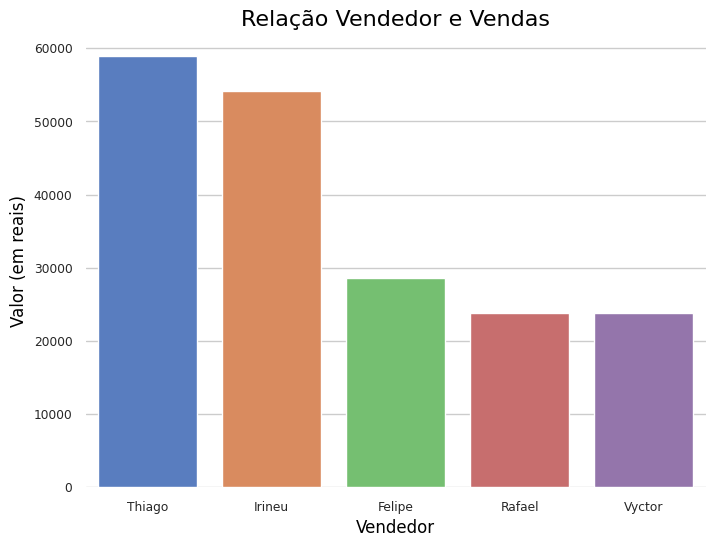

In [340]:
plt.figure(figsize=(8, 6), dpi=100)
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1})

g = sns.barplot(x="nome_vendedor", y="valor_total_venda", data=top_vendores, color="blue", orient="v", palette="muted")
g.axes.set_title('Relação Vendedor e Vendas' , fontsize=16,color="black",alpha=2)

g.set_xlabel("Vendedor", size = 12,color="black")
g.set_ylabel("Valor (em reais)", size = 12,color="black")
sns.despine(left=True, bottom=True)
plt.show()

Tratamento de vendas por mês


In [309]:
variable_month = pd.DatetimeIndex(df['data_compra']).month.unique().tolist()


vendas_por_mes = []
valor_venda_por_mes = 0

#Nota: Implementar um algoritmo de busca mais eficiente.

for mes in variable_month:
  for index in range(0, len(df)):
    if(df['data_compra'][index].month == mes):
      valor_venda_por_mes = valor_venda_por_mes + df['valor_compra'][index]
  vendas_por_mes.append([mes, round(valor_venda_por_mes,2)])
  valor_venda_por_mes = 0


Tratamento para plot de gráfico

In [ ]:
meses_do_ano = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
vendas_por_mes_og = []
flag = True 

for x in range(0,len(meses_do_ano)):
  flag = True
  for y in range(0,len(vendas_por_mes)):
    if vendas_por_mes[y][0] - 1  == x:
        vendas_por_mes_og.append([meses_do_ano[x],vendas_por_mes[y][1]])
        flag = False
    elif  flag:
          vendas_por_mes_og.append([meses_do_ano[x],0])
          flag = False


Plot de Gráfico de vendas por mês no ano de 2019

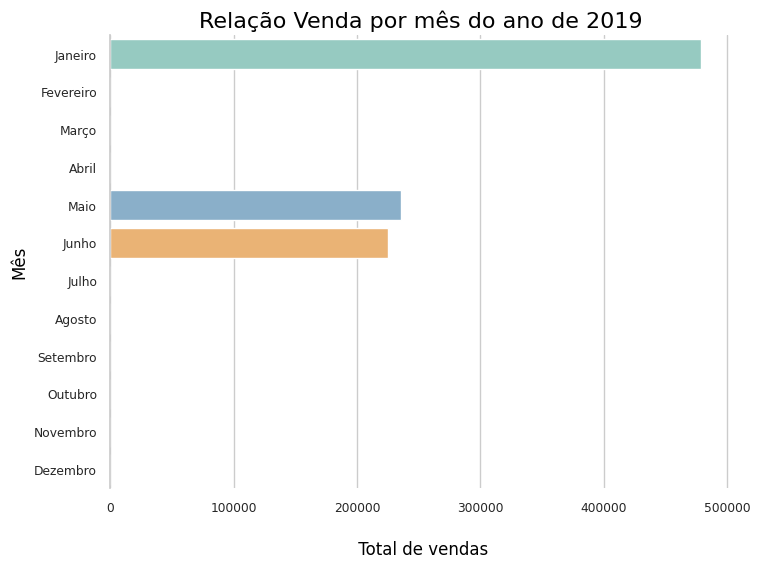

In [339]:
venda_mensal_df = pd.DataFrame(vendas_por_mes_og, columns =['mes', 'valor_da_venda'])

plt.figure(figsize=(8, 6), dpi=100)
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 0})

g = sns.barplot(x="valor_da_venda", y="mes", data=venda_mensal_df, order=meses_do_ano, palette='Set3', color="blue")
g.axes.set_title('Relação Venda por mês do ano de 2019' , fontsize=16,color="black",alpha=2)

g.set_xlabel("\n Total de vendas", size = 12,color="black")
g.set_ylabel("Mês", size = 12,color="black")
sns.despine(left=False, bottom=True)
plt.show()